In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


Provided Coefficient: 0.0003373 mV/Pa
Sensor Coefficient: 0.00032372981617829425 mV/Pa


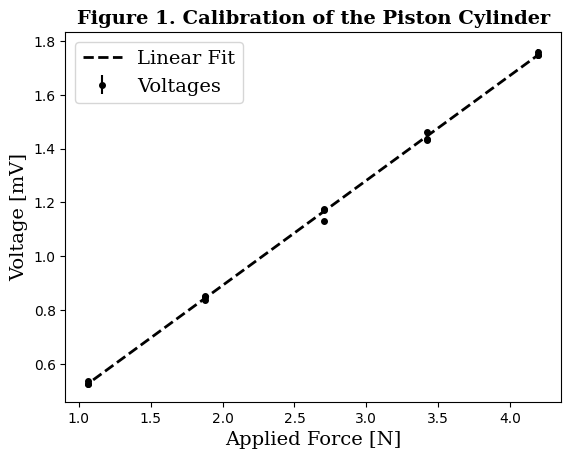

Sensor Coeff 0.3902348911413484 + 0.0029535378382643954 mV / N
R squared: 0.9992558629284839


In [113]:
# Data paths
cm1 = [
    "./Data/calibration mass 1/trial1.csv",
    "./Data/calibration mass 1/trial2.csv",
    "./Data/calibration mass 1/trial3.csv",
]
cm2 = [
    "./Data/calibration mass 2/trial1.csv",
    "./Data/calibration mass 2/trial2.csv",
    "./Data/calibration mass 2/trial3.csv",
]
cm3 = [
    "./Data/calibration mass 3/trial1.csv",
    "./Data/calibration mass 3/trial2.csv",
    "./Data/calibration mass 3/trial3.csv",
]
cm4 = [
    "./Data/calibration mass 4/trial1.csv",
    "./Data/calibration mass 4/trial2.csv",
    "./Data/calibration mass 4/trial3.csv",
]
cm5 = [
    "./Data/calibration mass 5/trial1.csv",
    "./Data/calibration mass 5/trial2.csv",
    "./Data/calibration mass 5/trial3.csv",
]

# Load data
data_cal = [
    np.loadtxt(cm1[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm1[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm1[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[2], delimiter=",", skiprows=7, usecols=[2]),
]

# Area of Piston head in m^2
PISTON_AREA = (np.pi / 4) * (32.5 * 0.001) ** 2

# Total force applied on each trial in Newtons
forces = (
    np.array(
        [
            35.06 + 73.372,
            35.06 + 73.372,
            35.06 + 73.372,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
        ]
    )
    * (1 / 1000)
    * 9.81
)

# Finding average and standard deviation for each trial
points = np.array([data_cal[i][2300:].mean() for i in range(len(data_cal))])
errors = np.array([(data_cal[i][2300:].std() * 2) for i in range(len(data_cal))])

# Linear regression
slope, intercept, rvalue, _, stderr = scipy.stats.linregress(forces, points)
force = np.linspace(1.1, 4.2, 1000)
curve_fit = slope * force + intercept

# Get slope in mV/Pa instead of mV/N
SENSOR_COEFF = slope * PISTON_AREA
print(f"Provided Coefficient: 0.0003373 mV/Pa")
print(f"Sensor Coefficient: {SENSOR_COEFF} mV/Pa")

# Plotting
font = dict(family="serif", size=14)
title = dict(family="serif", size=14, weight="bold")
marker = dict(color="black", linestyle="none", marker=".", markersize=8)
line = dict(color="black", linestyle="--", linewidth=2)

plt.errorbar(forces, points, errors, label="Voltages", **marker)
plt.plot(force, curve_fit, label="Linear Fit", **line)
plt.xlabel("Applied Force [N]", **font)
plt.ylabel("Voltage [mV]", **font)
plt.title("Figure 1. Calibration of the Piston Cylinder", **title)
plt.legend(prop=font)
plt.show()

print(f"Sensor Coeff {slope} + {stderr} mV / N")
print(f"R squared: {rvalue ** 2}")




In [114]:
# Data paths
om1 = [
    "./Data/oscillation mass 1/trial1.csv",
    "./Data/oscillation mass 1/trial2.csv",
    "./Data/oscillation mass 1/trial3.csv",
]
om2 = [
    "./Data/oscillation mass 2/trial1.csv",
    "./Data/oscillation mass 2/trial2.csv",
    "./Data/oscillation mass 2/trial3.csv",
]
om3 = [
    "./Data/oscillation mass 3/trial1.csv",
    "./Data/oscillation mass 3/trial2.csv",
    "./Data/oscillation mass 3/trial3.csv",
]
omn = [
    "./Data/oscillation no mass/trial1.csv",
    "./Data/oscillation no mass/trial2.csv",
    "./Data/oscillation no mass/trial3.csv",
]


# Load air oscillation data
data_air = [
    np.loadtxt(om1[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om1[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om1[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[2], delimiter=",", skiprows=7, usecols=[1,2]),
]



# Convert mV readings to Pa using calibration coefficient
for i, data_point in enumerate(data_air):
    data_air[i][:, 1] = data_point[:, 1] * (1 / SENSOR_COEFF)


P_0: 1713.4629020712764
k: 35.04065408036421
omega: 121.44750415354859
C: 17339.456837987593
phi: 0.11075606089022302
75.47991631208639


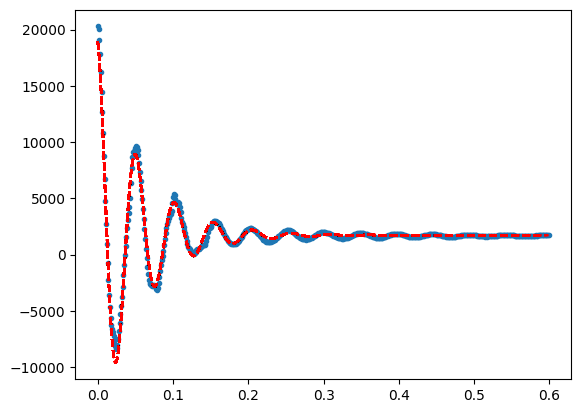

P_0: 1700.7008308733766
k: 74.73150484515006
omega: 100.48512418252173
C: -25066.689506232793
phi: 3.417101247304262
58.05052428795154


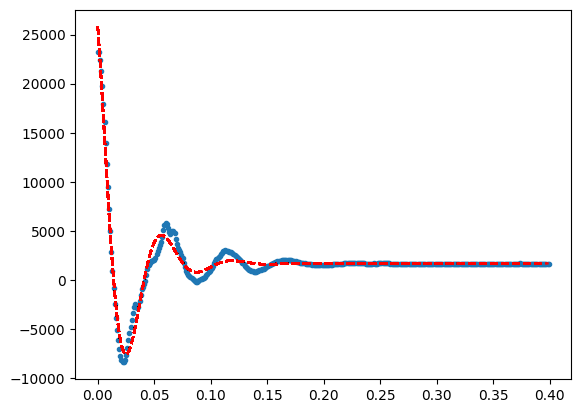

P_0: 1718.6899808565356
k: 35.30773675360779
omega: 123.50142138090615
C: 17360.56965818101
phi: 0.08578120517994228
77.788291219972


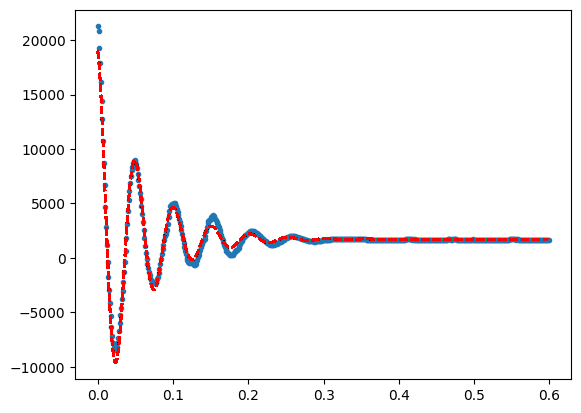

P_0: 2726.7824981377
k: 22.0223036202899
omega: 89.04867304759212
C: -19764.691016309072
phi: 3.138861899092604
45.053916866530614


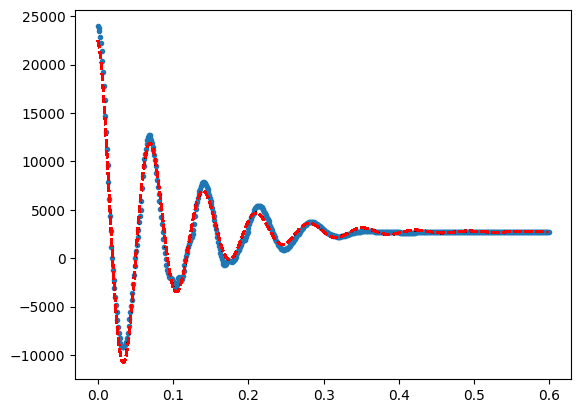

P_0: 2693.3063032887976
k: 34.06439352183781
omega: 76.82573133608742
C: -18416.368963059726
phi: 3.1976390346282764
35.08354267903919


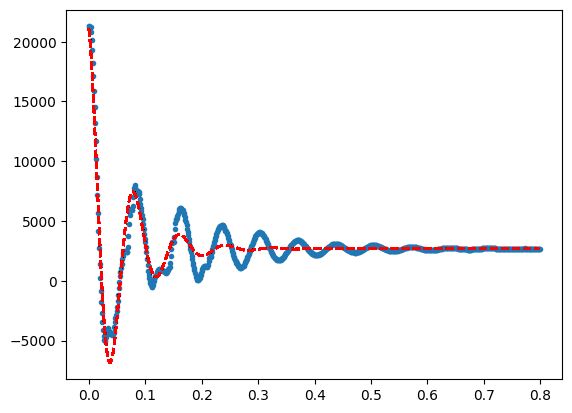

P_0: 2779.4873871090354
k: 35.804840140695
omega: 88.27356915800166
C: -21399.472323116937
phi: 3.19977891671159
44.53892722308247


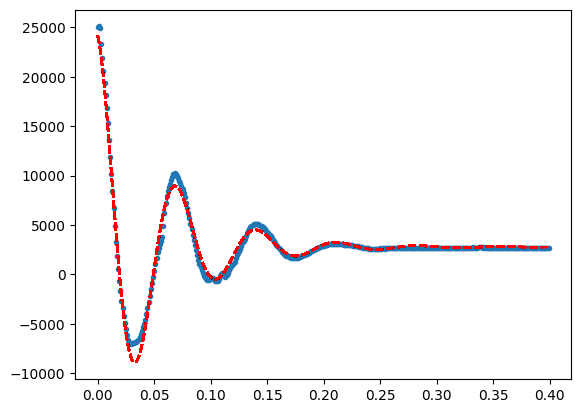

P_0: 3742.091761080084
k: 17.983105194184592
omega: 80.06572048770546
C: -5008.0699479061495
phi: 2.977297153971074
38.09919860501202


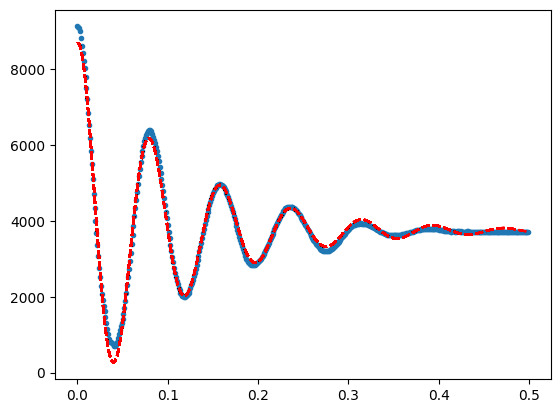

P_0: 3814.5352886812757
k: 23.058725468209342
omega: 76.34293650896704
C: -25210.47421177022
phi: 3.213462747916644
34.32289808169226


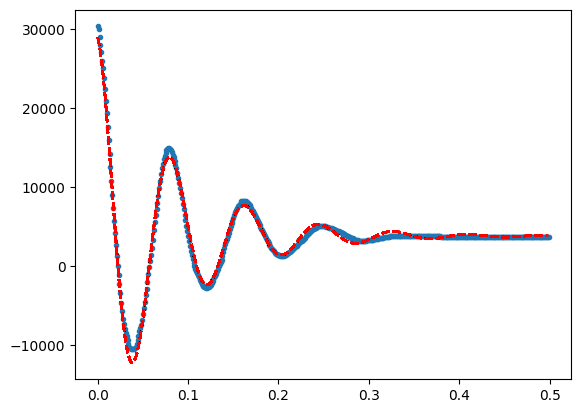

P_0: 3863.7138633887193
k: 35.86974787046055
omega: 76.37373877005078
C: -19778.964634787408
phi: 3.2316392112773906
34.98561292460205


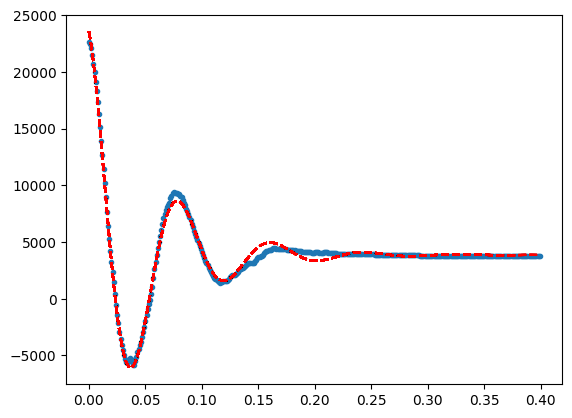

P_0: 792.9141077323483
k: 29.63035528101426
omega: 219.4420192906244
C: 8246.703854086812
phi: -0.007907678518079561
169.67353125620357


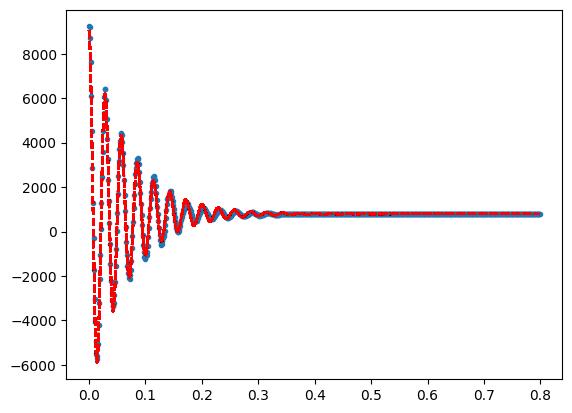

P_0: 798.2528023098411
k: 26.55815017954998
omega: 221.30500023710076
C: 11136.348739787783
phi: -0.45306986171973285
171.24917254847318


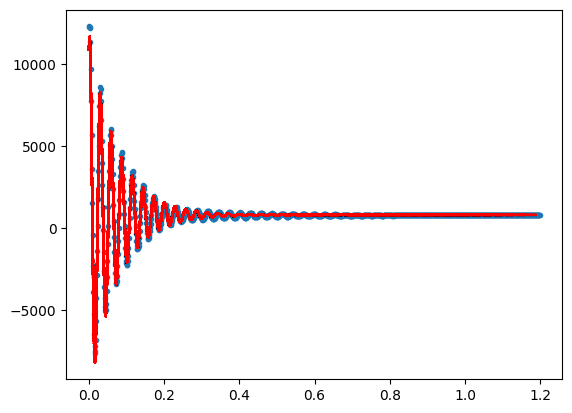

P_0: 797.7049332581889
k: 33.77103567750212
omega: 220.89887197314297
C: -9831.073326985836
phi: 2.335025001785293
171.119930915706


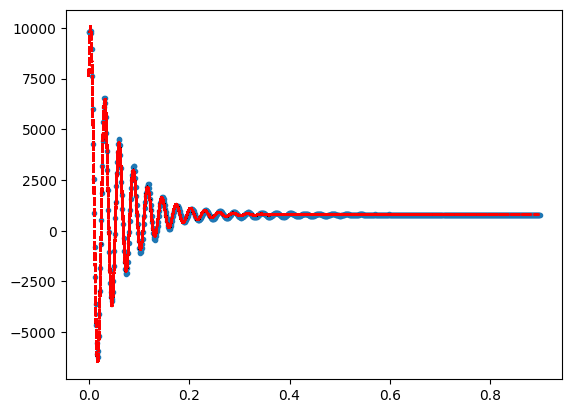

In [131]:
# Piston cylinder device constants in SI units
PISTON_AREA = (np.pi / 4) * (32.5 * 0.001) ** 2
TUBE_VOLUME = (43.3 * 0.01) * ((np.pi / 4) * ((3.8 * 0.001) ** 2))
CYLINDER_VOLUME = PISTON_AREA * (60 * 0.001)
TOTAL_VOLUME = TUBE_VOLUME + CYLINDER_VOLUME

# Masses for each trial in kg
PLUNGER_MASS = np.array(
    [
        73.1 + 35.0,
        73.1 + 35.0,
        73.1 + 35.0,
        157.035 + 35.0,
        157.035 + 35.0,
        157.035 + 35.0,
        241.399 + 35.0,
        241.399 + 35.0,
        241.399 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
    ]
) * (1 / 1000)


# Fuctions defining piston oscillations and getting kappa values
def osc(t, P_0, k, omega, C, phi):
    return P_0 + C * np.exp(-k * t / 2) * np.cos(omega * t + phi)


def kappa(P_0, k, omega, m):
    return (omega**2 + k**2 / 4) * ((m * TOTAL_VOLUME) / (P_0 * PISTON_AREA**2))


# Kappa calcs for air

# Hand picked offsets for oscillation starts and ends
start_idxs = [1835, 1415, 1804, 748, 2043, 1920, 1539, 1659, 1038, 2167, 1907, 1980]
end_offset = [600, 400, 600, 600, 800, 400, 500, 500, 400, 800, 1200, 900]
for i, data_point in enumerate(data_air):
    start_idx = start_idxs[i]
    end_idx = start_idx + end_offset[i]
    
    # Initial parameters (P_0, k, omega, C, phi)
    init_params = [data_point[end_idx, 1], 20, 100, data_point[start_idx, 1], 2]
    
    
    osc_t = data_point[start_idx:end_idx, 0] - data_point[start_idx, 0]
    osc_P = data_point[start_idx:end_idx, 1]
    fit_params = scipy.optimize.curve_fit(osc, osc_t, osc_P, p0=init_params)

    time = np.linspace(0, osc_t[:end_idx], 1000)
    print(f"P_0: {fit_params[0][0]}\nk: {fit_params[0][1]}\nomega: {fit_params[0][2]}\nC: {fit_params[0][3]}\nphi: {fit_params[0][4]}")
    print(kappa(*fit_params[0][:3], PLUNGER_MASS[i]))
    plt.plot(osc_t, osc_P, ".", label="data")
    plt.plot(time, osc(time, *fit_params[0]), "r--", label="optimized")
    #plt.legend()
    plt.show()


In [ ]:
start_idxs